## MNIST Classification

Import the necessary libraries

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

### Section 1) Fetching the MNIST dataset

In [2]:
mnist_dataset = fetch_openml('mnist_784', version=1)

In [3]:
mnist_dataset

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

As seen in the above result, the fetch_openml function returned the data in a python dictionary structure.
<br>mnist_dataset dictionary structure has keys with corresponding values.
<br>Key: data    Value: an array with one row per instance and one column per feature
<br>Key: target  Value: an array with the digits
<br>Key: DESCR   Value: dataset details

### Section 2) Display and examination of the MNIST dataset

Extract the pixel-values (data) and the digit (target) from the mnist_dataset dictionary (dataset) into a pandas dataframe.

In [4]:
df_mnist = pd.DataFrame(mnist_dataset['data'], columns = mnist_dataset['feature_names'])

In [5]:
df_mnist['Digit'] = mnist_dataset['target'].astype(np.uint8)

The pixel data representing the digit is represented in columns ranging from pixel1 to pixel784
<br>The digit value is in the last 'digit' column.

In [6]:
df_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


The describe() method gives basic statistical values for the dataset.

In [7]:
df_mnist.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Digit
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


Here, the value_counts() method is used to check the unique values in the 'Digit' column and the occurence / frequency of these values.

In [8]:
df_mnist['Digit'].value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: Digit, dtype: int64

#### Display the first 10 images of the dataset via a loop

The first 10 digits in the dataset are as follows:

In [9]:
df_mnist['Digit'].head(10)

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: Digit, dtype: uint8

Below is the for loop to display first 10 images in the dataset

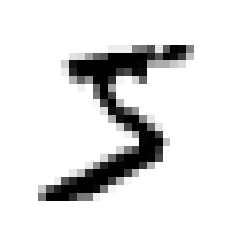

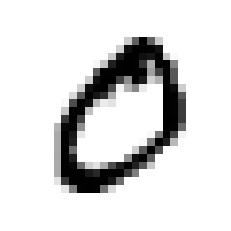

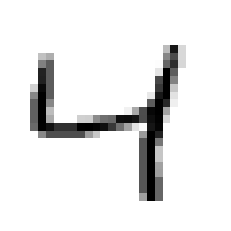

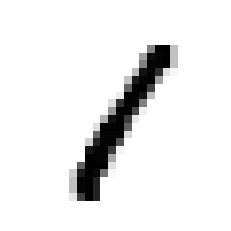

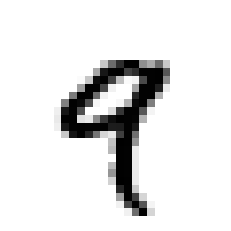

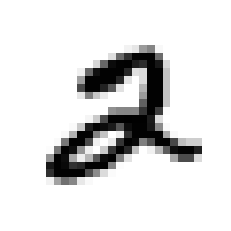

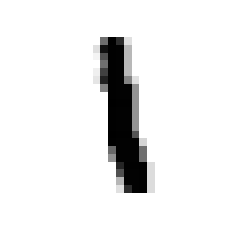

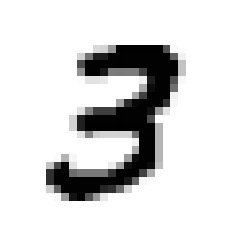

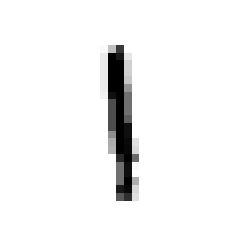

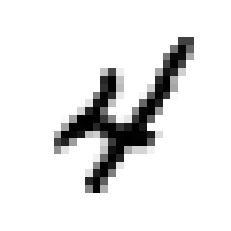

In [14]:
for i in range(10):
    digit = df_mnist.iloc[i,0:784].values.astype('float')
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

### Section 3) Train a Stochastic Gradient Descent (SGD) binary classifier

As mentioned in the mnist_dataset['DESCR'] the MNIST dataset is already split into a training set (the first 60,000
images) and a test set (the last 10,000 images)

In [15]:
X_train= df_mnist.iloc[0:60000,0:784].values.astype('float')
X_test = df_mnist.iloc[60000:70000,0:784].values.astype('float')
y_train=df_mnist['Digit'].values.astype('int')[:60000]
y_test = df_mnist['Digit'].values.astype('int')[60000:]

The number from the dataset that I want to classify is 9.
<br>A binary classifier will segregate the values into two classes, 9 and not 9.
<br>So, if it is 9, the value will be set to <strong>True</strong>, else it will be set to <strong>False</strong>.

In [16]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [17]:
#Since we have the digit 9 at the 4th row position in the training data, 
#the y_train_9 has True stored at that 4th position in y_train_9.
y_train_9[4]

True

Training the Stochastic Gradient Classifier using the training data

In [18]:
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_9)

SGDClassifier(random_state=42)

We pass an image to the classifier and will see if it correctly classifies the image (9 or not 9).

In [19]:
#On row position 4, we have a pixel data for digit 9 as seen when the first 10 images were displayed
digit_image_9 = df_mnist.iloc[4,0:784].values.astype('float')

In [20]:
#The Stochastic Gradient Descent (SGD) binary classifier classifies the pixel data correctly and gives the result as 'True' (class 9)
print(f'Is the given input an image of digit 9?: {sgd_classifier.predict([digit_image_9])[0]}')

Is the given input an image of digit 9?: True


In [21]:
#On row position 0, we have a pixel data for digit 5 as seen when the first 10 images were displayed
#Digit 5 comes under the class 'not 9'
digit_image_not_9 = df_mnist.iloc[0,0:784].values.astype('float')

In [22]:
#The Stochastic Gradient Descent (SGD) binary classifier classifies the pixel data for digit 5 correctly and gives the result as 'False' (class not 9)
print(f'Is the given input an image of digit 9?: {sgd_classifier.predict([digit_image_not_9])[0]}')

Is the given input an image of digit 9?: False


### Section 4) Determine the precision of your SGD classifier using a Confusion matrix

Getting a prediction for each instance in the training set

In [23]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_9, cv=3)

In [24]:
#y_train_9 : Target / Actual value classes
#y_train_pred : Predicted value classes
confusion_matrix(y_train_9, y_train_pred)

array([[52715,  1336],
       [ 1695,  4254]], dtype=int64)

Confusion Matrix Explanation:<br>
True Negatives: The value <strong>52715</strong> stands for the images that were correctly classified as not 9<br>
False Positives: The value <strong>1336</strong> stands for the images that were incorrectly classified as 9<br>
False Negatives: The value <strong>1695</strong> stands for the images that were incorrectly classified as not 9<br>
True Positives: The value <strong>4254</strong> stands for the images that were correctly classified as 9<br>
Total count: 60000 (training data)

Suppose the classifier predicted the classes correctly.
That means, the performance of the classifier is 100% accurate and the predicted class (9 or not 9) is equivalent to the actual class, then the confusion matrix will be as below:

In [25]:
# predicted = actual
y_train_perfect_predictions = y_train_9 
confusion_matrix(y_train_9, y_train_perfect_predictions)

array([[54051,     0],
       [    0,  5949]], dtype=int64)

Confusion Matrix Explanation:<br>
True Negatives: The value <strong>54051</strong> stands for the images that were correctly classified as not 9<br>
False Positives: The value <strong>0</strong> stands for the images that were incorrectly classified as 9<br>
False Negatives: The value <strong>0</strong> stands for the images that were incorrectly classified as not 9<br>
True Positives: The value <strong>5949</strong> stands for the images that were correctly classified as 9<br>
Total count: 60000 (training data)